# Editing SingleCellStatic Objects Using a Viewer
In this tutorial, we will focus on creating a viewer to visually edit and manage SingleCellStatic objects. 

In [30]:
# import some common libraries
import os
import glob
import os.path
import numpy as np
import json, random, cv2
from cellpose import models
from cellpose.io import imread
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path
from skimage import measure
from PIL import Image, ImageSequence

# from livecellx import segment
from livecellx import core
from livecellx.core import datasets
from livecellx.core import SingleCellTrajectory, SingleCellStatic
from livecellx.core.datasets import LiveCellImageDataset, SingleImageDataset


In [31]:
from livecellx.sample_data import tutorial_three_image_sys
from pathlib import Path
from livecellx.core.datasets import LiveCellImageDataset
import glob


In [32]:
import napari
napari.__version__

'0.4.18'

## Preparing data for editing
In most use cases, the data would be loaded from external sources. The sample dataset paths provided here are placeholders, and the actual paths should be set according to your dataset's location.

### Loading EBSS data

In [33]:

# dataset_dir_path = Path(
#     "../datasets/EBSS_Starvation/tif_STAV-A549_VIM_24hours_NoTreat_NA_YL_Ti2e_2022-12-21/XY16/"
# )

# mask_dataset_path = Path("../datasets/EBSS_Starvation/tif_STAV-A549_VIM_24hours_NoTreat_NA_YL_Ti2e_2022-12-21/out/XY16/seg")

# mask_dataset = LiveCellImageDataset(mask_dataset_path, ext="png")
# time2url = sorted(glob.glob(str((Path(dataset_dir_path) / Path("*_DIC.tif")))))
# time2url = {i: path for i, path in enumerate(time2url)}
# dic_dataset = LiveCellImageDataset(time2url=time2url, ext="tif")

# from livecellx.segment.utils import prep_scs_from_mask_dataset
# single_cells = prep_scs_from_mask_dataset(mask_dataset, dic_dataset)


In [34]:
# from livecellx.core import SingleCellStatic
# SingleCellStatic.write_single_cells_json(single_cells, 
#                                          path="./datasets/test_scs_EBSS_starvation/single_cells.json",
#                                          dataset_dir="./datasets/test_scs_EBSS_starvation/datasets")

### Loading sample data

In [35]:
dic_dataset, mask_dataset = tutorial_three_image_sys()

|-----> Downloading data to datasets\test_data_STAV-A549.zip
|-----> Data already exists at datasets\test_data_STAV-A549.zip
|-----> Extracting data to datasets
3 png img file paths loaded;
3 tif img file paths loaded;


In [37]:
from skimage.measure import regionprops
from livecellx.core.io_sc import prep_scs_from_mask_dataset
single_cells = prep_scs_from_mask_dataset(mask_dataset, dic_dataset)
SingleCellStatic.write_single_cells_json(single_cells, 
                                         path="./datasets/test_data_STAV-A549/tutorial_three_img_single_cells.json",
                                         dataset_dir="./datasets/test_data_STAV-A549/datasets")

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:07<00:00,  2.56s/it]


### Setting path for single cells json file

In [38]:
scs_path = "./datasets/test_data_STAV-A549/tutorial_three_img_single_cells.json"
# scs_path = "./datasets/test_scs_EBSS_starvation/single_cells.json"
# scs_path = "./datasets/test_scs_EBSS_starvation/tmp_corrected_scs.json"

single_cells = SingleCellStatic.load_single_cells_json(path=scs_path)

In [39]:
# Load the CSN model checkpoint
from livecellx.core.sc_seg_operator import ScSegOperator, create_sc_seg_napari_ui
# replace the path below with your downdloaded CSN checkpoint path
ckpt_path = r"C:\Users\13290\Documents\Single-cell\LiveCell\LiveCellTracker-dev\notebooks\csn_models\v11-01_epoch=229-best.ckpt"
ScSegOperator.load_default_csn_model(path=ckpt_path, cuda=True);

Lightning automatically upgraded your loaded checkpoint from v1.8.6 to v2.0.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\13290\Documents\Single-cell\LiveCell\LiveCellTracker-dev\notebooks\csn_models\v11-01_epoch=229-best.ckpt`
c:\Users\13290\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\13290\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date we

>>> Using BCE loss with logits loss
>>> Based on loss type, training output threshold:  0.5


## Setting up the viewer for SingleCellStatic objects
Next, we need to enable the Qt GUI, which will allow us to interactively visualize and edit our data using napari.

In [40]:
def enable_gui_qt():
    from IPython import get_ipython

    ipython = get_ipython()
    ipython.run_line_magic('gui', 'qt')


enable_gui_qt()

With the GUI enabled, we can now create our viewer for editing SingleCellStatic objects.

In [41]:
from livecellx.core.sct_operator import create_scs_edit_viewer
sct_operator = create_scs_edit_viewer(single_cells, img_dataset = dic_dataset)

c:\Users\13290\AppData\Local\Programs\Python\Python39\lib\site-packages\napari\plugins\_plugin_manager.py:555: UserWarning: Plugin 'napari_skimage_regionprops2' has already registered a function widget 'duplicate current frame' which has now been overwritten
  warn(message=warn_message)


Now, the viewer will be launched, and you can interactively edit and manage the SingleCellStatic objects. Use the provided tools to make desired changes.
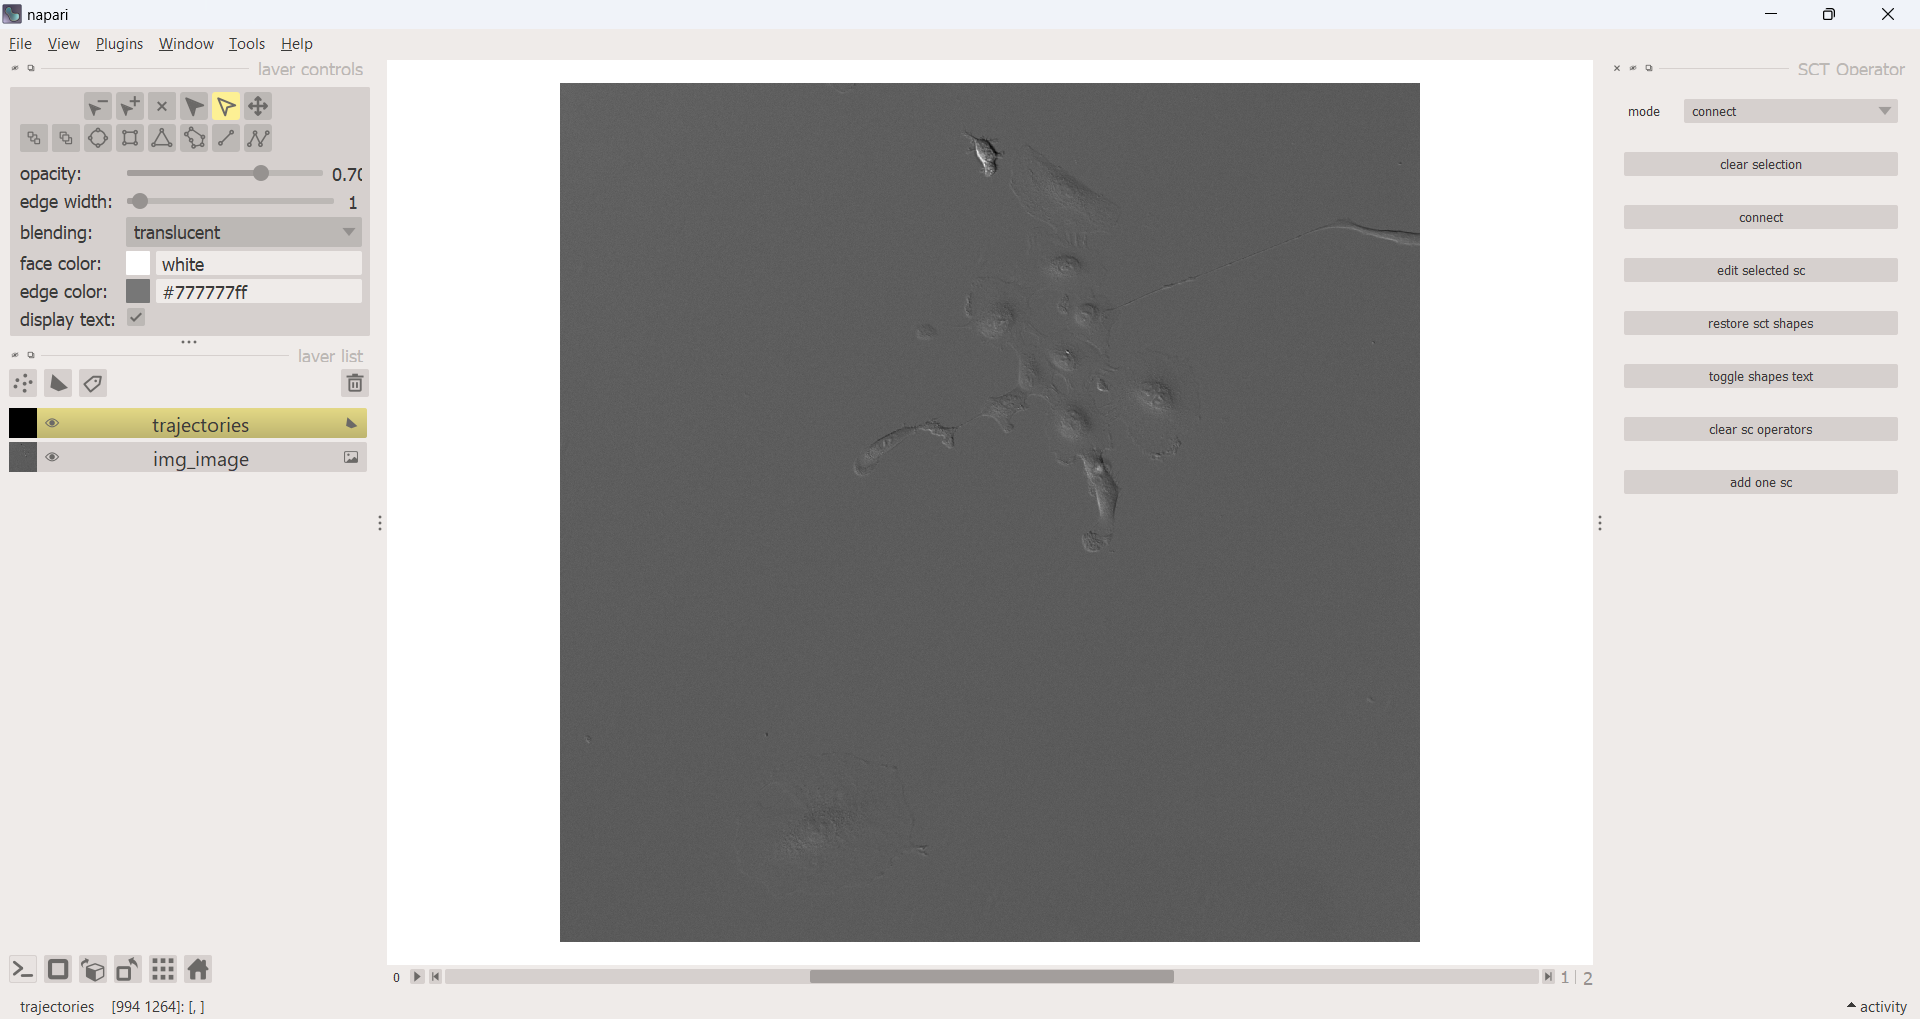

In [43]:
# sct_operator.shape_layer.selected_data = [0]
# sc_operator = sct_operator.edit_selected_sc()

We use CSN model to correct segmentation and save it as a new SingleCellStatic object. Finnally we filter the cells by size.

In [44]:
# sc_operator.csn_correct_seg_callback()
# sc_operator.save_seg_callback()
# sc_operator.filter_cells_by_size_callback(min_size=100, max_size=1000)

In [45]:
# len(sc_operator.shape_layer.selected_data), len(sc_operator.shape_layer.data)

In [46]:
# sc_operator.resample_contours_callback(40)
# sc_operator.restore_sc_contour_callback()
# sct_operator.clear_sc_opeartors()
# sct_operator.add_new_sc()

## Updating and Saving Edits
After making desired edits, it's essential to save or update the data.

In [48]:
# Update SingleCellStatic objects based on edits
all_scs = sct_operator.get_all_scs()
len(all_scs)

42

Now we clear `Sc Operator`.

In [49]:
sct_operator.clear_sc_opeartors()

We eidt the seleted single cell using `Sc Operator` and save it.

In [50]:
sct_operator.edit_selected_sc()

|-----? More than one shape is selected. The first selected shape is used for editing.
>>> create sc layer done


ScSegOperator(sc=SingleCellStatic(id=bfefa50d-cb69-4a93-b0d5-2494129961e1, timeframe=2, bbox=[1664.  539. 1835.  771.]), mode=0)

We clear `Sc Operator` again.

In [51]:
sct_operator.clear_sc_opeartors()

clearing sc operator:  ScSegOperator(sc=SingleCellStatic(id=6a070fa2-18c4-4447-b19d-c1128a7a1c6a, timeframe=1223, bbox=[1593.  573. 1667.  636.]), mode=0)


clearing sc operator:  ScSegOperator(sc=SingleCellStatic(id=6a070fa2-18c4-4447-b19d-c1128a7a1c6a, timeframe=1223, bbox=[1593.  573. 1667.  636.]), mode=0)


clearing sc operator:  ScSegOperator(sc=SingleCellStatic(id=bfefa50d-cb69-4a93-b0d5-2494129961e1, timeframe=2, bbox=[1664.  539. 1835.  771.]), mode=0)


In [52]:
# sct_operator.viewer.layers.remove(sct_operator.sc_operators[0].shape_layer)

We update SctOperator's shape layer by an updated single cell

In [53]:
sct_operator.update_shape_layer_by_sc(single_cells[0])

<update shape layer by sc>
clearing selection...
<clear complete>
current shape layer shape properties:  Event
setting face color of selected shape...
<selection complete>
clearing selection...
<clear complete>
<update shape layer by sc complete>


We get all the single cells from the sct operators

In [54]:
len(sct_operator.get_all_scs()), len(set(sct_operator.get_all_scs()))

(42, 42)

We track based on single cells

In [55]:
from livecellx.track.sort_tracker_utils import (
    gen_SORT_detections_input_from_contours,
    update_traj_collection_by_SORT_tracker_detection,
    track_SORT_bbox_from_contours,
    track_SORT_bbox_from_scs
)
all_scs = [sc for sc in all_scs if sc.timeframe != 1]
sctc = track_SORT_bbox_from_scs(all_scs, raw_imgs=all_scs[0].img_dataset, min_hits=3, max_age=3)

## Viewing a Subset of Data
Sometimes, you might want to focus on a specific timeframe or subset of your data. Here shows a subset of a sctc filtered by time_span

In [56]:
from livecellx.core.sct_operator import create_scts_operator_viewer, create_scs_edit_viewer

scts_operator = create_scs_edit_viewer(single_cells, img_dataset = dic_dataset, time_span=(145, 155))

# # If you would like to start from sctc, you can use the following code
# scts_operator = create_scts_operator_viewer(sctc, img_dataset = dic_dataset, time_span=(1, 2))

|-----> A new SCTC object with size 42 is created by subsetting the original sctc with time span (145, 155)


c:\Users\13290\AppData\Local\Programs\Python\Python39\lib\site-packages\napari\plugins\_plugin_manager.py:555: UserWarning: Plugin 'napari_skimage_regionprops2' has already registered a function widget 'duplicate current frame' which has now been overwritten
  warn(message=warn_message)
c:\Users\13290\AppData\Local\Programs\Python\Python39\lib\site-packages\napari\utils\colormaps\standardize_color.py:200: UserWarning: Given color input is empty. Converting input to a white color array.
  warnings.warn(


The viewer will now show only the specified time span of the dataset. Make any edits as required.

In [57]:
# sctc.write_json(path="./EBSS_starvation_24h_xy16_annotation/single_cell_trajectory_collection.json")